In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
X_train = pd.read_csv('agg_Xtrain.csv').set_index('Unnamed: 0')
X_test = pd.read_csv('agg_Xtest.csv').set_index('Unnamed: 0')
y_train = pd.read_csv('agg_ytrain.csv').set_index('Unnamed: 0')
y_test = pd.read_csv('agg_ytest.csv').set_index('Unnamed: 0')

In [3]:
#hyperparameter tuning
Kcv = KFold(n_splits=10)
parameters = {'hidden_layer_sizes':[30,50,100],
              'alpha':[1e-6,1e-5,0.0001, 0.01],
              'learning_rate':['constant', 'adaptive'],
              'max_iter':[100, 200,500],
              'epsilon': [1e-10, 1e-08],
}

mlp = MLPClassifier()
cv = GridSearchCV(mlp, param_grid=parameters, cv=Kcv)

In [4]:
%%time
#best params found by grid search
cv.fit(X_train,y_train)
cv.best_params_

CPU times: user 1h 37min 24s, sys: 24min 23s, total: 2h 1min 47s
Wall time: 32min 26s


{'alpha': 1e-05,
 'hidden_layer_sizes': 50,
 'learning_rate': 'adaptive',
 'max_iter': 200}

In [5]:
%%time
mlp.set_params(**cv.best_params_)
mlp.fit(X_train,y_train)
pred = mlp.predict(X_test)
f1 = f1_score(y_test, pred, average='weighted')
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')

print(f"precision: {precision}, recall: {recall}, f1score: {f1}")

precision: 0.34638918058090284, recall: 0.3483709273182957, f1score: 0.33714778358736125
CPU times: user 5.1 s, sys: 1.31 s, total: 6.41 s
Wall time: 1.35 s


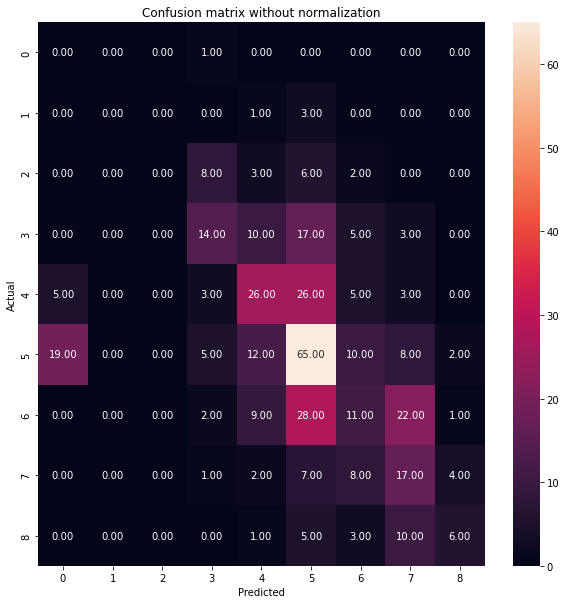

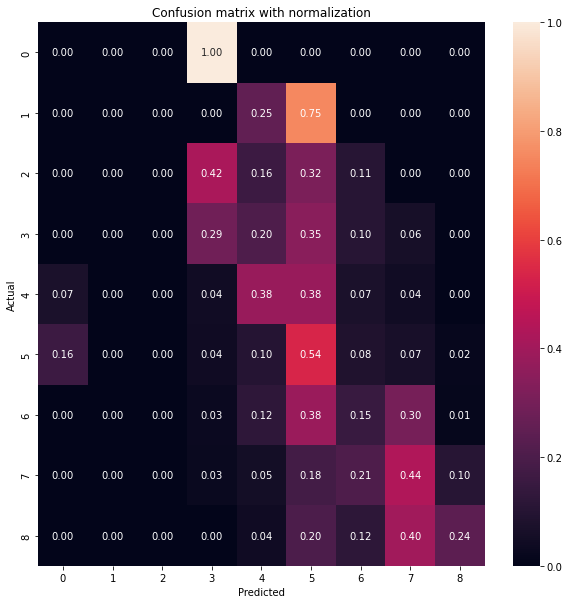

In [6]:
#plot result

matrix = confusion_matrix(y_test, pred)
matrix_normalized = confusion_matrix(y_test, pred, normalize='true')

fig1, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix, annot=True, fmt='.2f')
plt.title('Confusion matrix without normalization')
plt.ylabel('Actual')
plt.xlabel('Predicted')

fig2, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix_normalized, annot=True, fmt='.2f')
plt.title('Confusion matrix with normalization')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
